Questions for the data-
1. which category do people spend the most money on?
2. which merchant do people spend the most money on?
3. which category has the highest fraud?  
4. which merchant has the highest fraud?
for graphs how many fraud cases in each category(bar chart)
for amount and 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read the csv file
pd.read_csv('credit_card_fraud.csv')

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


In [6]:
df_credit_card_data = pd.read_csv('credit_card_fraud.csv')

In [7]:
fraud = df_credit_card_data['is_fraud'].value_counts()
fraud

0    337825
1      1782
Name: is_fraud, dtype: int64

In [8]:
# checking if there are is any missing data
df_credit_card_data.count()


trans_date_trans_time    339607
merchant                 339607
category                 339607
amt                      339607
city                     339607
state                    339607
lat                      339607
long                     339607
city_pop                 339607
job                      339607
dob                      339607
trans_num                339607
merch_lat                339607
merch_long               339607
is_fraud                 339607
dtype: int64

# Data Analysis

Step 1

In [10]:
my_part_credit_card_data = df_credit_card_data[['merchant','category','amt','is_fraud']]
my_part_credit_card_data.head()

,merchant,category,amt,is_fraud
0,"Heller, Gutmann and Zieme",grocery_pos,107.23,0
1,Lind-Buckridge,entertainment,220.11,0
2,Kiehn Inc,grocery_pos,96.29,0
3,Beier-Hyatt,shopping_pos,7.77,0
4,Bruen-Yost,misc_pos,6.85,0


In [11]:
my_part_credit_card_data['category'].unique()
category_part = my_part_credit_card_data['category'].unique()
category_part

array(['grocery_pos', 'entertainment', 'shopping_pos', 'misc_pos',
       'shopping_net', 'gas_transport', 'misc_net', 'grocery_net',
       'food_dining', 'health_fitness', 'kids_pets', 'home',
       'personal_care', 'travel'], dtype=object)

In [12]:
just_category = my_part_credit_card_data[['category','is_fraud']]
just_category

,category,is_fraud
0,grocery_pos,0
1,entertainment,0
2,grocery_pos,0
3,shopping_pos,0
4,misc_pos,0
...,...,...
339602,home,0
339603,kids_pets,0
339604,health_fitness,0
339605,kids_pets,0


In [13]:
category_data = just_category.set_index('category')
category_data.head()

,is_fraud
category,
grocery_pos,0
entertainment,0
grocery_pos,0
shopping_pos,0
misc_pos,0


In [14]:
frauds_df = category_data.loc[(category_data["is_fraud"] > 0) , :]
frauds_df.head(10)

,is_fraud
category,
grocery_net,1
shopping_net,1
misc_pos,1
grocery_pos,1
health_fitness,1
gas_transport,1
gas_transport,1
grocery_pos,1
misc_net,1


In [22]:
category_fraud = just_category.groupby(['category'])

df_fraud = category_fraud.sum()
df_fraud.head(15)

,is_fraud
category,
entertainment,55
food_dining,38
gas_transport,153
grocery_net,27
grocery_pos,433
health_fitness,36
home,50
kids_pets,55
misc_net,217


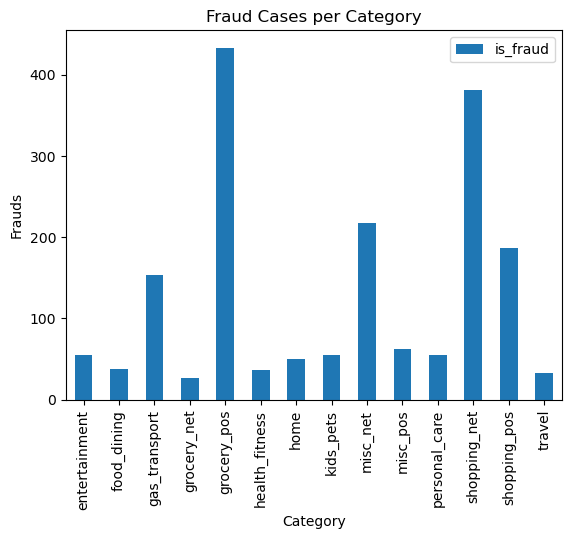

In [23]:
fraud_chart = df_fraud.plot(kind = 'bar')
fraud_chart.set_title('Fraud Cases per Category')
fraud_chart.set_xlabel('Category')
fraud_chart.set_ylabel('Frauds')
plt.show()

In [24]:
plt.savefig('Fraud_Cases_Category.pdf')


<Figure size 640x480 with 0 Axes>

In [25]:
plt.close()

In [31]:
	just_amt = my_part_credit_card_data[['amt','is_fraud']]
just_amt

,amt,is_fraud
0,107.23,0
1,220.11,0
2,96.29,0
3,7.77,0
4,6.85,0
...,...,...
339602,12.68,0
339603,13.02,0
339604,43.77,0
339605,86.88,0


In [35]:
twofrauds_df = just_amt.loc[(just_amt["is_fraud"] > 0) , :]
twofrauds_df.head(10)

,amt,is_fraud
945,14.37,1
1077,966.11,1
1184,49.61,1
1192,295.26,1
1202,18.17,1
1236,20.45,1
1239,18.19,1
1322,367.29,1
1403,768.15,1
1462,849.49,1


In [38]:
twofrauds_df.min()

amt         1.78
is_fraud    1.00
dtype: float64

In [39]:
twofrauds_df.max()

amt         1371.81
is_fraud       1.00
dtype: float64

In [40]:
twofrauds_df.mean()

amt         518.06546
is_fraud      1.00000
dtype: float64

In [49]:
bins = [1, 100, 200, 300, 500, 1000, 1500]

group_labels = ['$1-$100', '$101-$200', '$201-$300', '$301-$500', '$501-$1000', '$1001-$1500']

In [50]:
pd.cut(twofrauds_df["amt"], bins, labels=group_labels).head()

945        $1-$100
1077    $501-$1000
1184       $1-$100
1192     $201-$300
1202       $1-$100
Name: amt, dtype: category
Categories (6, object): ['$1-$100' < '$101-$200' < '$201-$300' < '$301-$500' < '$501-$1000' < '$1001-$1500']

In [51]:
twofrauds_df["Transaction_Amount"] = pd.cut(twofrauds_df["amt"], bins, labels=group_labels)
twofrauds_df.head()

/var/folders/pm/pllcqt754tx1jnz2zwmsbm6h0000gn/T/ipykernel_6354/23557222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twofrauds_df["Transaction_Amount"] = pd.cut(twofrauds_df["amt"], bins, labels=group_labels)


,amt,is_fraud,Transaction Amount,Transaction_Amount
945,14.37,1,$1-$100,$1-$100
1077,966.11,1,$501-$1000,$501-$1000
1184,49.61,1,$1-$100,$1-$100
1192,295.26,1,$201-$300,$201-$300
1202,18.17,1,$1-$100,$1-$100


In [56]:

twofrauds_df.head()

,amt,is_fraud,Transaction_Amount
945,14.37,1,$1-$100
1077,966.11,1,$501-$1000
1184,49.61,1,$1-$100
1192,295.26,1,$201-$300
1202,18.17,1,$1-$100


In [65]:
amount_fraud = twofrauds_df.groupby(['Transaction_Amount'])
df2_fraud = amount_fraud.sum()
df2_fraud.head(7)


,amt,is_fraud
Transaction_Amount,,
$1-$100,7098.86,407
$101-$200,4451.17,37
$201-$300,49819.58,180
$301-$500,108088.51,321
$501-$1000,516262.75,618
$1001-$1500,237471.78,219


In [63]:
ddf2_fraud = df2_fraud[['is_fraud']]
ddf2_fraud.head()

,is_fraud
Transaction_Amount,
$1-$100,407
$101-$200,37
$201-$300,180
$301-$500,321
$501-$1000,618


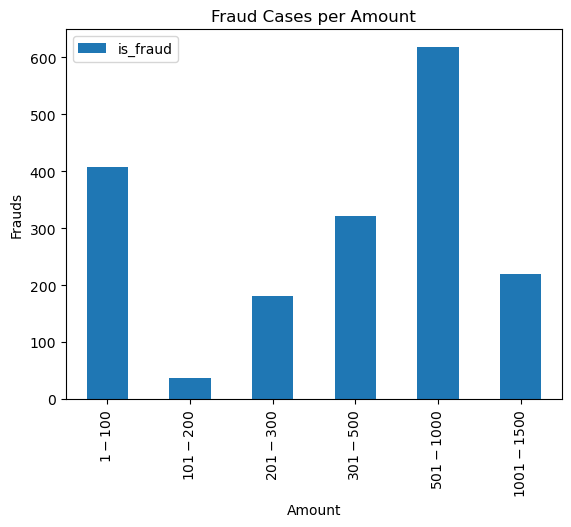

In [64]:
a_fraud_chart = ddf2_fraud.plot(kind = 'bar')
a_fraud_chart.set_title('Fraud Cases per Amount')
a_fraud_chart.set_xlabel('Amount')
a_fraud_chart.set_ylabel('Frauds')
plt.show()

In [ ]:
plt.savefig('Fraud_Cases_Amount.pdf')

In [ ]:
plt.close()